In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
#conda install openpyxl

In [3]:
path = "/Users/mush/Downloads/Pricing Case - RevenueML.xlsx"

df_historical_sales = pd.read_excel(path, sheet_name="RAWDATA", skiprows=12)
df_customers = pd.read_excel(path, sheet_name="RAWDATA2", skiprows=10)
df_stores = pd.read_excel(path, sheet_name="RAWDATA3", skiprows=5)
df_categories = pd.read_excel(path, sheet_name="RAWDATA4", skiprows=5)

In [4]:
df_historical_sales.head()

,YEAR,MONTH,STORE,DAYPART,CATEGORY_ID,REVENUE_NET,QTY
0,2018,1,1,B,10,11700,2050
1,2018,1,1,D,10,3700,570
2,2018,1,1,L,10,7700,1270
3,2018,2,1,B,10,11800,2070
4,2018,2,1,D,10,3700,570


In [5]:
df_customers.head()

,STORE,DAYPART,YEAR,MONTH,CUSTOMER_COUNT
0,1,B,2018,1,3312
1,1,B,2018,2,3366
2,1,B,2018,3,4116
3,1,B,2018,4,4713
4,1,B,2018,5,5040


In [6]:
df_stores.head()

,STORE,CITY,STATE,NAME,AREA,REGIONAL_DIRECTOR,REGION
0,1,RIO GRANDE,OH,RIO GRANDE,1,"GREEN, JOE","CHARLESTON, WV"
1,2,CHILLICOTHE,OH,CHILLICOTHE,26,"YELLOW, JAMES","COLUMBUS, OH"
2,3,COLUMBUS,OH,ROUTE 161,7,"YELLOW, JAMES","COLUMBUS, OH"
3,4,COLUMBUS,OH,GROVES ROAD,81,"YELLOW, JAMES","COLUMBUS, OH"
4,5,SOUTH CHARLESTON,WV,SOUTH CHARLESTON,11,"GREEN, JOE","CHARLESTON, WV"


In [7]:
df_categories.head()

,CATEGORY_ID,CATEGORY_DESC,COMMENTS
0,10,BREAKFAST,Breakfast items
1,15,SENIORS MEALS,Seniors Meals
2,20,DINNER,Dinner items
3,25,DINNER ALA,Dinner a-la carte items
4,30,LUNCH,Lunch items


In [8]:
df_historical_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   YEAR         5400 non-null   int64 
 1   MONTH        5400 non-null   int64 
 2   STORE        5400 non-null   int64 
 3   DAYPART      5400 non-null   object
 4   CATEGORY_ID  5400 non-null   int64 
 5   REVENUE_NET  5400 non-null   int64 
 6   QTY          5400 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 295.4+ KB


In [9]:
# Ensure no duplicated entries in sales data
df_historical_sales[df_historical_sales.duplicated()]

,YEAR,MONTH,STORE,DAYPART,CATEGORY_ID,REVENUE_NET,QTY


In [10]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   STORE           540 non-null    int64 
 1   DAYPART         540 non-null    object
 2   YEAR            540 non-null    int64 
 3   MONTH           540 non-null    int64 
 4   CUSTOMER_COUNT  540 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 21.2+ KB


In [11]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   STORE              10 non-null     int64 
 1   CITY               10 non-null     object
 2   STATE              10 non-null     object
 3   NAME               10 non-null     object
 4   AREA               10 non-null     int64 
 5   REGIONAL_DIRECTOR  10 non-null     object
 6   REGION             10 non-null     object
dtypes: int64(2), object(5)
memory usage: 692.0+ bytes


In [12]:
df_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CATEGORY_ID    11 non-null     int64 
 1   CATEGORY_DESC  11 non-null     object
 2   COMMENTS       11 non-null     object
dtypes: int64(1), object(2)
memory usage: 396.0+ bytes


The data appears to already be clean, and manually exploring it revealed no anomalies either. 

## Data Visualization

Let's take a look at the sales data and understand some basic trends.

First, let's make some columns more readable for the purpose of visulization. Specifically this includes adding the month names, store names, part of the day, and meal category names.

In [13]:
# Sales data

sales_duplicate = df_historical_sales.copy()


# Create mapping for months
month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
sales_duplicate['MONTH_NAME'] = sales_duplicate['MONTH'].map(month_map)


# Create mapping for part of day
daypart_map = {
    'B': 'Breakfast',
    'L': 'Lunch',
    'D': 'Dinner'
}
sales_duplicate['DAYPART_DESC'] = sales_duplicate['DAYPART'].map(daypart_map)


# Join store names, region, and regional director
sales_duplicate = sales_duplicate.merge(df_stores[['STORE', 'NAME', 'REGION', 'REGIONAL_DIRECTOR']], how='left',
                                       left_on='STORE', right_on='STORE')
sales_duplicate.rename(columns = {'NAME':'STORE_NAME'}, inplace = True)
sales_duplicate.REGIONAL_DIRECTOR = sales_duplicate.REGIONAL_DIRECTOR.str.title()
sales_duplicate['CITY'] = sales_duplicate.REGION.apply(lambda x: x.split(', ')[-2]).str.title()
sales_duplicate['STATE'] = sales_duplicate.REGION.apply(lambda x: x.split(', ')[-1])
sales_duplicate.STORE_NAME = sales_duplicate.STORE_NAME.str.title()


# Join meal category names
sales_duplicate = sales_duplicate.merge(df_categories[['CATEGORY_ID','COMMENTS']], how='left',
                                       left_on='CATEGORY_ID', right_on='CATEGORY_ID')
sales_duplicate.rename(columns = {'NAME':'MEAL_CATEGORY', 'COMMENTS':'CATEGORY_NAME'}, inplace = True)


# Drop redundant columns
#sales_duplicate.drop(['MONTH','STORE','DAYPART','CATEGORY_ID'], axis=1, inplace=True)


sales_duplicate.head()

,YEAR,MONTH,STORE,DAYPART,CATEGORY_ID,REVENUE_NET,QTY,MONTH_NAME,DAYPART_DESC,STORE_NAME,REGION,REGIONAL_DIRECTOR,CITY,STATE,CATEGORY_NAME
0,2018,1,1,B,10,11700,2050,January,Breakfast,Rio Grande,"CHARLESTON, WV","Green, Joe",Charleston,WV,Breakfast items
1,2018,1,1,D,10,3700,570,January,Dinner,Rio Grande,"CHARLESTON, WV","Green, Joe",Charleston,WV,Breakfast items
2,2018,1,1,L,10,7700,1270,January,Lunch,Rio Grande,"CHARLESTON, WV","Green, Joe",Charleston,WV,Breakfast items
3,2018,2,1,B,10,11800,2070,February,Breakfast,Rio Grande,"CHARLESTON, WV","Green, Joe",Charleston,WV,Breakfast items
4,2018,2,1,D,10,3700,570,February,Dinner,Rio Grande,"CHARLESTON, WV","Green, Joe",Charleston,WV,Breakfast items


In [14]:
# Customer data

customers_duplicate = df_customers.copy()


# Map month names
customers_duplicate['MONTH_NAME'] = customers_duplicate['MONTH'].map(month_map)


# Map part of day
customers_duplicate['DAYPART_DESC'] = customers_duplicate['DAYPART'].map(daypart_map)


# Join store names
customers_duplicate = customers_duplicate.merge(df_stores[['STORE', 'NAME','REGIONAL_DIRECTOR','REGION']], how='left',
                                       left_on='STORE', right_on='STORE')
customers_duplicate.rename(columns = {'NAME':'STORE_NAME'}, inplace = True)
customers_duplicate.STORE_NAME = customers_duplicate.STORE_NAME.str.title()
customers_duplicate.REGIONAL_DIRECTOR = customers_duplicate.REGIONAL_DIRECTOR.str.title()
customers_duplicate['CITY'] = customers_duplicate.REGION.apply(lambda x: x.split(', ')[-2]).str.title()
customers_duplicate['STATE'] = customers_duplicate.REGION.apply(lambda x: x.split(', ')[-1])
customers_duplicate.drop(['REGION'], axis=1, inplace=True)

customers_duplicate.head()

,STORE,DAYPART,YEAR,MONTH,CUSTOMER_COUNT,MONTH_NAME,DAYPART_DESC,STORE_NAME,REGIONAL_DIRECTOR,CITY,STATE
0,1,B,2018,1,3312,January,Breakfast,Rio Grande,"Green, Joe",Charleston,WV
1,1,B,2018,2,3366,February,Breakfast,Rio Grande,"Green, Joe",Charleston,WV
2,1,B,2018,3,4116,March,Breakfast,Rio Grande,"Green, Joe",Charleston,WV
3,1,B,2018,4,4713,April,Breakfast,Rio Grande,"Green, Joe",Charleston,WV
4,1,B,2018,5,5040,May,Breakfast,Rio Grande,"Green, Joe",Charleston,WV


In [15]:
revenue_by_year = df_historical_sales[['YEAR','MONTH','REVENUE_NET']].groupby(['YEAR','MONTH']).sum().reset_index()
revenue_by_year

,YEAR,MONTH,REVENUE_NET
0,2018,1,1380400
1,2018,2,1284500
2,2018,3,1415300
3,2018,4,1419800
4,2018,5,1441400
5,2018,6,1431300
6,2018,7,1524000
7,2018,8,1463500
8,2018,9,1455700
9,2018,10,1544900


In [16]:
sales_jan_to_june = sales_duplicate[sales_duplicate.MONTH <= 6]

In [17]:
# Revenues for 2019 and 2019
# 2019 only has data until June, so it could be useful to have this number for 2018 as well
revenue_2018_total = sales_duplicate[sales_duplicate.YEAR==2018]['REVENUE_NET'].sum()
revenue_2018_to_june = sales_duplicate[(sales_duplicate.YEAR==2018) & (sales_duplicate.MONTH<=6)]['REVENUE_NET'].sum()
revenue_2019_ytd = sales_duplicate[(sales_duplicate.YEAR==2019)]['REVENUE_NET'].sum()
percent_change = 100 * (revenue_2019_ytd - revenue_2018_to_june) / revenue_2018_to_june

# Total revenue for 2018
print(f"Total revenue for 2018 was ${revenue_2018_total}.")

# Total revenue for the first 6 months of 2018
print(f"Revenue for the first 6 months of 2018 was ${revenue_2018_to_june}.")

# Total revenue for the first 6 months of 2019
print(f"Revenue for the first 6 months of 2019 was ${revenue_2019_ytd}.")

# Percentage change
print(f"This represents a modest increase in revenue by {percent_change:0.3}% over this period.")

Total revenue for 2018 was $17217300.
Revenue for the first 6 months of 2018 was $8372700.
Revenue for the first 6 months of 2019 was $8491200.
This represents a modest increase in revenue by 1.42% over this period.


In [46]:
def plot_numbers(data, x_var, y_var, year=None, split_year=False, x_tick_rotation=45, print_values=False, value_rotation=0, y_axis_top=None):
    '''
    Parameters
    ----------
    x_var : Takes in the x_variable. Currently works with CATEOGRY_NAMES, DAYPART_DESC
    y_var : Takes in the y_variable. Currently works with REVENUE_NET, CUSTOMER_COUNT
    year : Uses the entire dataset by default. If 'year' value is specified, plots data for that year. Currently works for 2018 and 2019
    split_year : False by default. If True, splits the annual data into two halves and plots a stacked bar plot
    x_tick_rotation : 90 by default. Sets rotation of the x-axis labels
    print_values : False by default. Toggles whether or not to print values on the bar chart.
    value_rotation : Horizontal by default. Set the rotation of the values printed on the bar chart. 
    y_axis_top : Sets the height of the y-axis 
    '''
    
    if year!=None:
        data = data[data.YEAR==year]
    
    order = data.groupby(by=[x_var])[y_var].sum().sort_values(ascending=False).index
    #print(order)
    fig = sns.barplot(data=data, y=y_var, x=x_var, 
                orient='v', estimator='sum', errorbar=None, color='green', order=order)
    plt.xlabel(None)
    plt.xticks(rotation=x_tick_rotation)
    plt.ylabel(f"{y_var.title()}", size=12)
    if print_values==True:
        fig.bar_label(fig.containers[0], fmt='%.0f', rotation=value_rotation)
    fig.yaxis.set_major_formatter(ticker.EngFormatter())
    
    if year==None:
        plt.title(f"{y_var.title()} by {x_var.title()}, Total")
    else:
        plt.title(f"{y_var.title()} by {x_var.title()}, {year}")
        fig.set_ylim(bottom=0, top=y_axis_top)
        
    if split_year==True:
        fig2 = sns.barplot(data=data[(data.YEAR==year) & (data.MONTH<=6)], y=y_var, x=x_var, 
                orient='v', estimator='sum', errorbar=None, color='darkgreen', order=order)
        #print(order)
        if print_values==True:
            fig2.bar_label(fig.containers[1], fmt='%.0f', color='white', rotation=value_rotation)
        plt.xlabel(None)
        plt.xticks(rotation=x_tick_rotation)
        plt.ylabel(f"{y_var.title()}", size=12)

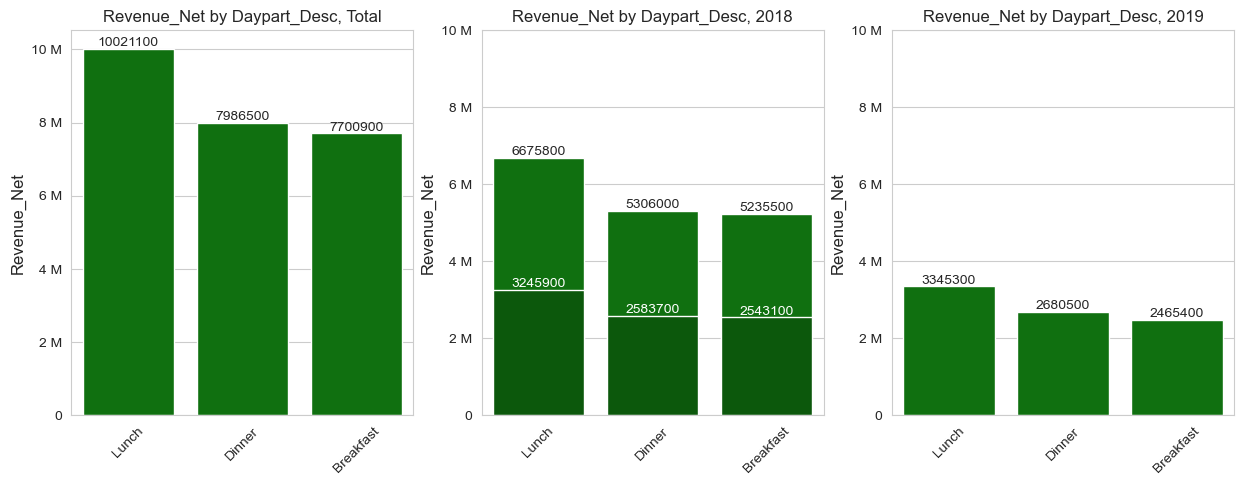

In [47]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plot_numbers(sales_duplicate, x_var='DAYPART_DESC', y_var='REVENUE_NET', 
             print_values=True)

plt.subplot(1,3,2)
plot_numbers(sales_duplicate, x_var='DAYPART_DESC', y_var='REVENUE_NET', year=2018,  split_year=True,
             print_values=True, y_axis_top=10000000)

plt.subplot(1,3,3)
plot_numbers(sales_duplicate, x_var='DAYPART_DESC', y_var='REVENUE_NET', year=2019, 
             print_values=True, y_axis_top=10000000)


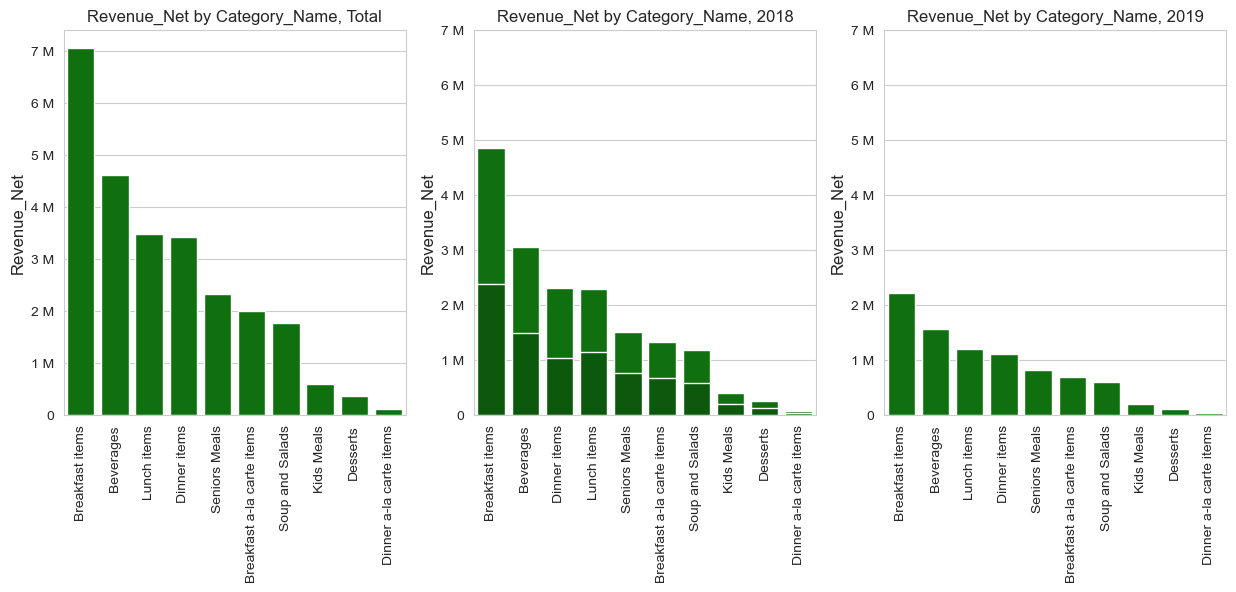

In [20]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plot_numbers(sales_duplicate, x_var='CATEGORY_NAME', y_var='REVENUE_NET', x_tick_rotation=90)

plt.subplot(1,3,2)
plot_numbers(sales_duplicate, x_var='CATEGORY_NAME', y_var='REVENUE_NET', year=2018, split_year=True,
             x_tick_rotation=90, y_axis_top=7000000)

plt.subplot(1,3,3)
plot_numbers(sales_duplicate, x_var='CATEGORY_NAME', y_var='REVENUE_NET', year=2019, 
             x_tick_rotation=90, y_axis_top=7000000)

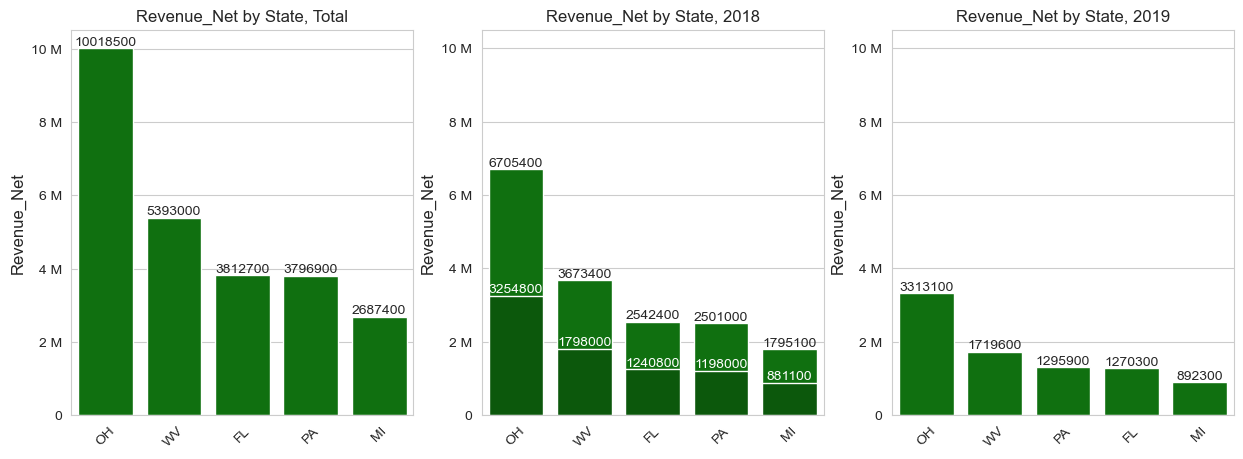

In [43]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plot_numbers(sales_duplicate, x_var='STATE', y_var='REVENUE_NET',
            print_values=True)

plt.subplot(1,3,2)
plot_numbers(sales_duplicate, x_var='STATE', y_var='REVENUE_NET', year=2018, split_year=True,
             print_values=True, y_axis_top=10500000)

plt.subplot(1,3,3)
plot_numbers(sales_duplicate, x_var='STATE', y_var='REVENUE_NET', year=2019, 
             print_values=True, y_axis_top=10500000)

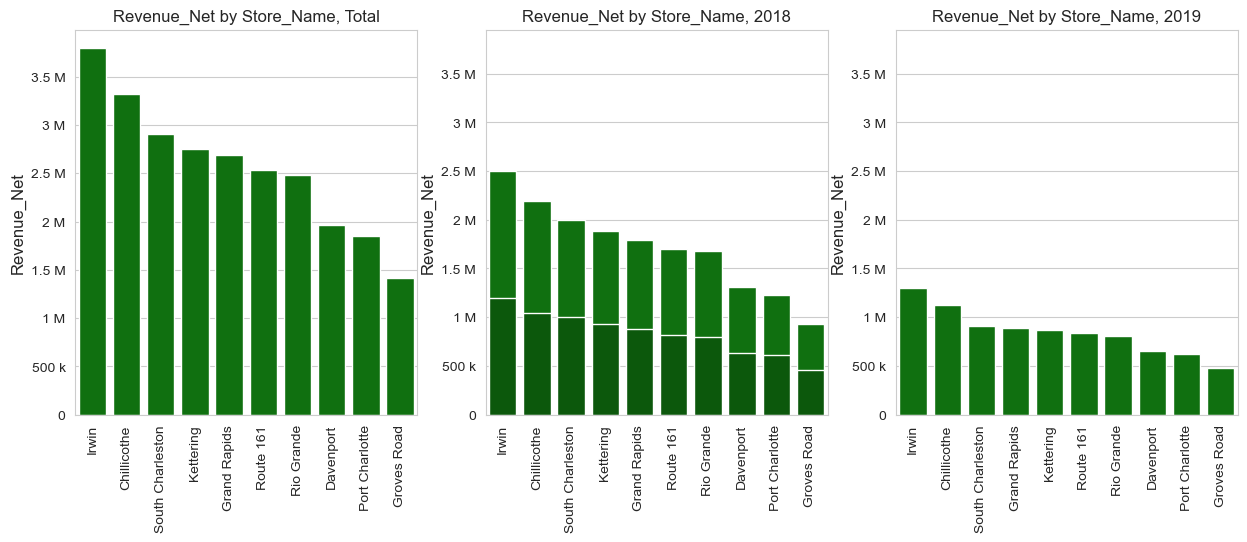

In [22]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plot_numbers(sales_duplicate, x_var='STORE_NAME', y_var='REVENUE_NET', x_tick_rotation=90)

plt.subplot(1,3,2)
plot_numbers(sales_duplicate, x_var='STORE_NAME', y_var='REVENUE_NET', year=2018, split_year=True,
             x_tick_rotation=90, y_axis_top=3950000)

plt.subplot(1,3,3)
plot_numbers(sales_duplicate, x_var='STORE_NAME', y_var='REVENUE_NET', year=2019, 
             x_tick_rotation=90, y_axis_top=3950000)

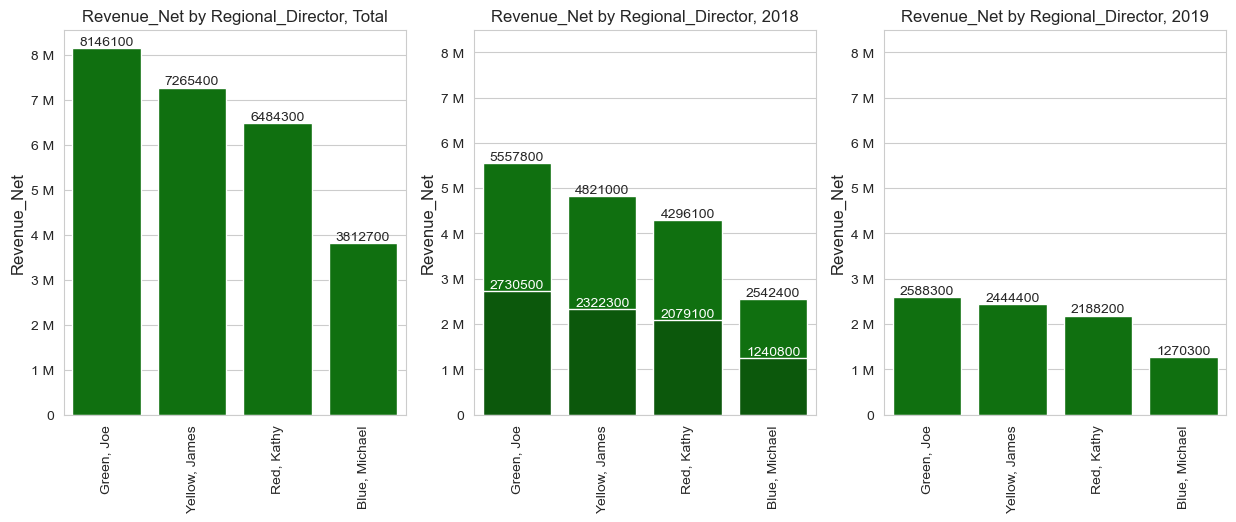

In [62]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plot_numbers(sales_duplicate, x_var='REGIONAL_DIRECTOR', y_var='REVENUE_NET', x_tick_rotation=90,
             print_values=True,)

plt.subplot(1,3,2)
plot_numbers(sales_duplicate, x_var='REGIONAL_DIRECTOR', y_var='REVENUE_NET', year=2018, split_year=True,
             print_values=True, x_tick_rotation=90, y_axis_top=8500000)

plt.subplot(1,3,3)
plot_numbers(sales_duplicate, x_var='REGIONAL_DIRECTOR', y_var='REVENUE_NET', year=2019, 
             print_values=True, x_tick_rotation=90, y_axis_top=8500000)

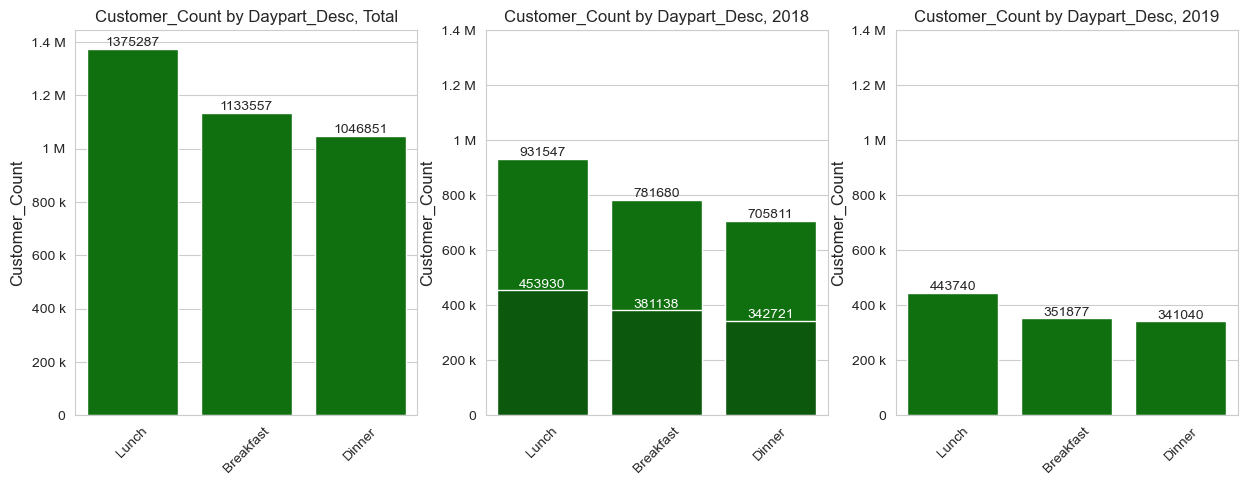

In [53]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plot_numbers(customers_duplicate, x_var='DAYPART_DESC', y_var='CUSTOMER_COUNT',
            print_values=True)

plt.subplot(1,3,2)
plot_numbers(customers_duplicate, x_var='DAYPART_DESC', y_var='CUSTOMER_COUNT', year=2018, split_year=True,
            print_values=True, y_axis_top=1400000)

plt.subplot(1,3,3)
plot_numbers(customers_duplicate, x_var='DAYPART_DESC', y_var='CUSTOMER_COUNT', year=2019, 
            print_values=True, y_axis_top=1400000)

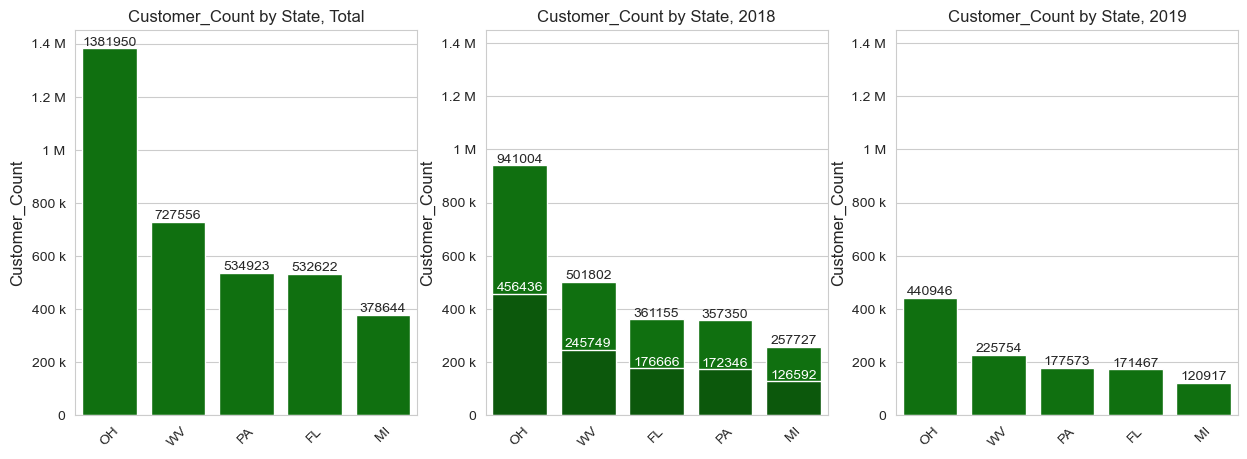

In [50]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plot_numbers(customers_duplicate, x_var='STATE', y_var='CUSTOMER_COUNT',
            print_values=True)

plt.subplot(1,3,2)
plot_numbers(customers_duplicate, x_var='STATE', y_var='CUSTOMER_COUNT', year=2018, split_year=True,
             print_values=True, y_axis_top=1450000)

plt.subplot(1,3,3)
plot_numbers(customers_duplicate, x_var='STATE', y_var='CUSTOMER_COUNT', year=2019, 
             print_values=True, y_axis_top=1450000)

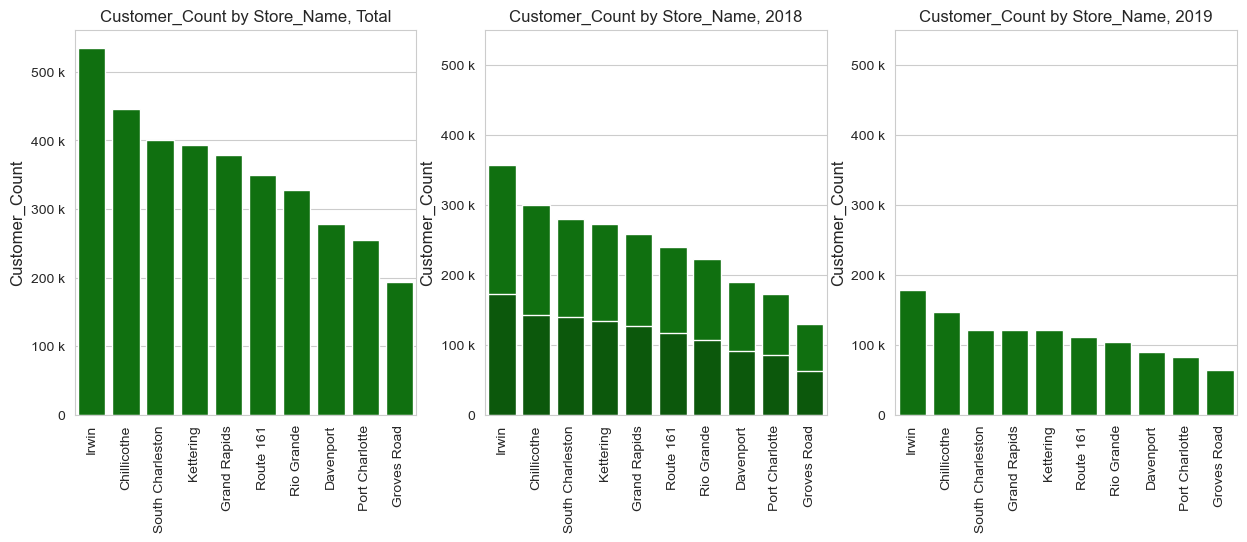

In [24]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plot_numbers(customers_duplicate, x_var='STORE_NAME', y_var='CUSTOMER_COUNT', x_tick_rotation=90)

plt.subplot(1,3,2)
plot_numbers(customers_duplicate, x_var='STORE_NAME', y_var='CUSTOMER_COUNT', year=2018, split_year=True, 
             x_tick_rotation=90, y_axis_top=550000)

plt.subplot(1,3,3)
plot_numbers(customers_duplicate, x_var='STORE_NAME', y_var='CUSTOMER_COUNT', year=2019, 
             x_tick_rotation=90, y_axis_top=550000)

In [25]:
# Customer counts for 2019 and 2019
# 2019 only has data until June, so it could be useful to have this number for 2018 as well
customers_2018_total = customers_duplicate[customers_duplicate.YEAR==2018]['CUSTOMER_COUNT'].sum()
customers_2018_to_june = customers_duplicate[(customers_duplicate.YEAR==2018) & (customers_duplicate.MONTH<=6)]['CUSTOMER_COUNT'].sum()
customers_2019_ytd = customers_duplicate[(customers_duplicate.YEAR==2019)]['CUSTOMER_COUNT'].sum()
percent_change = 100 * (customers_2019_ytd - customers_2018_to_june) / customers_2018_to_june

# Total revenue for 2018
print(f"Total number of customers for 2018 was {customers_2018_total}.")

# Total revenue for the first 6 months of 2018
print(f"Number of customers for the first 6 months of 2018 was {customers_2018_to_june}.")

# Total revenue for the first 6 months of 2019
print(f"Number of customers for the first 6 months 2019 was {customers_2019_ytd}.")

# Percentage change
print(f"This represents a decline in customers by {percent_change:0.3}% over this period.")

Total number of customers for 2018 was 2419038.
Number of customers for the first 6 months of 2018 was 1177789.
Number of customers for the first 6 months 2019 was 1136657.
This represents a decline in customers by -3.49% over this period.


In [26]:
def plot_store_sales(data, store_no=None):
    fig = sns.barplot(data=data, y='REVENUE_NET', x='MONTH_NAME', 
                hue='YEAR', orient='v', estimator='sum', errorbar=None)
    plt.xlabel(None)
    plt.xticks(rotation=45)
    plt.ylabel("Net Revenue", size=12)
    plt.title(f"Monthly Revenue for Store {store_no}")
    plt.legend(loc="upper right",bbox_to_anchor=(1.18, 1), borderaxespad=0)
    fig.yaxis.set_major_formatter(ticker.EngFormatter())
    if store_no != None:
        fig.set_ylim(bottom=0, top=250000)
        
        if store_no%2!=0:
            plt.legend().remove()
            
        if store_no%2==0:            
            plt.ylabel(None)

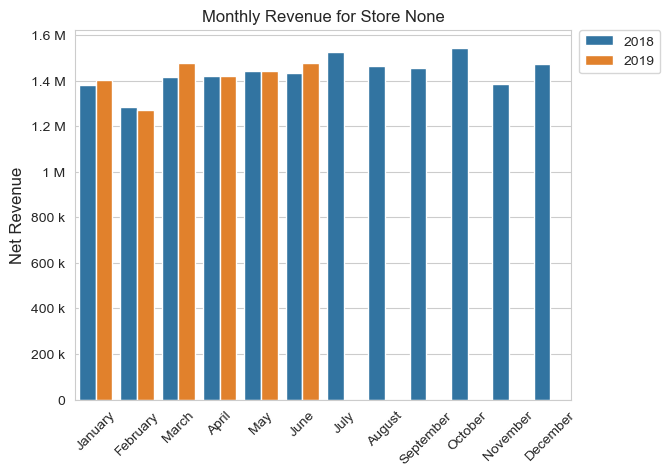

In [27]:
plot_store_sales(sales_duplicate)

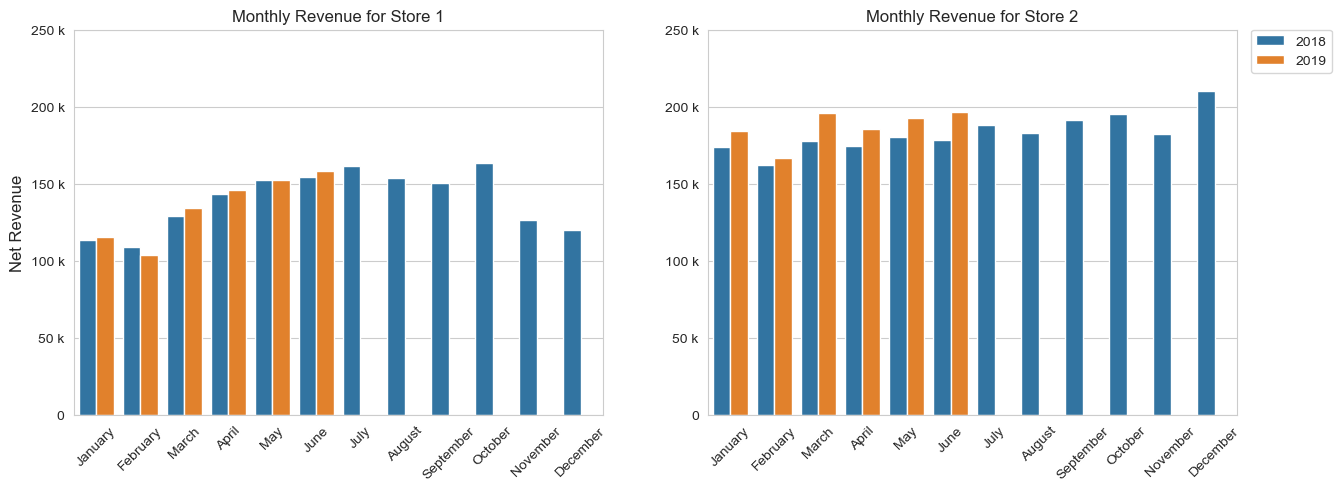

In [28]:
plt.figure(figsize = (15,5))
for i in range(1,3):
    plt.subplot(1,2,i)
    plot_store_sales(sales_duplicate[sales_duplicate.STORE==i], i)

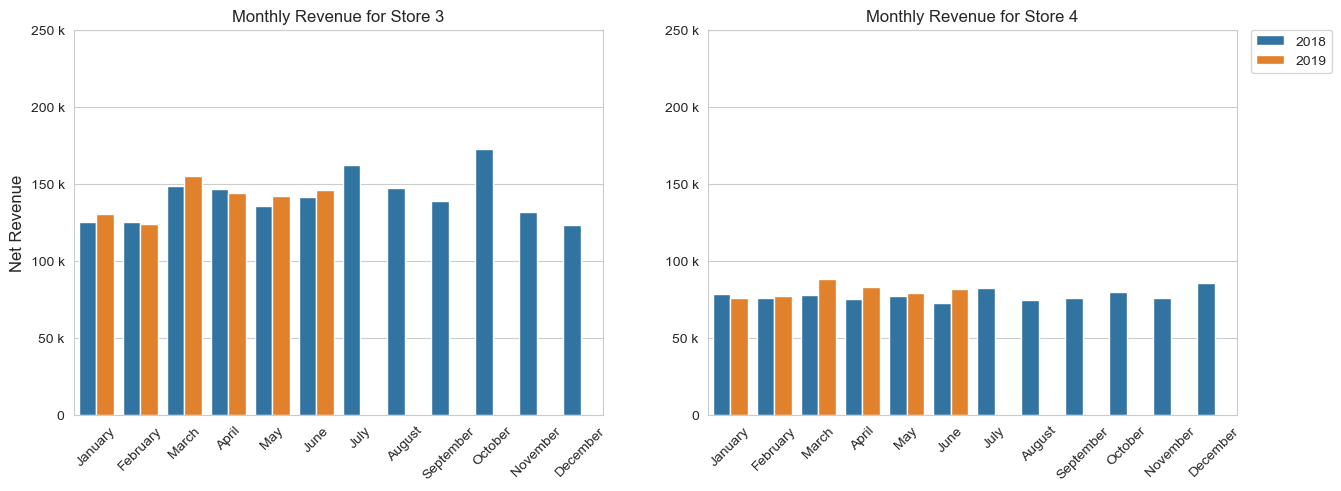

In [29]:
plt.figure(figsize = (15,5))
for i in range(3,5):
    plt.subplot(1,2,i-2)
    plot_store_sales(sales_duplicate[sales_duplicate.STORE==i], i)

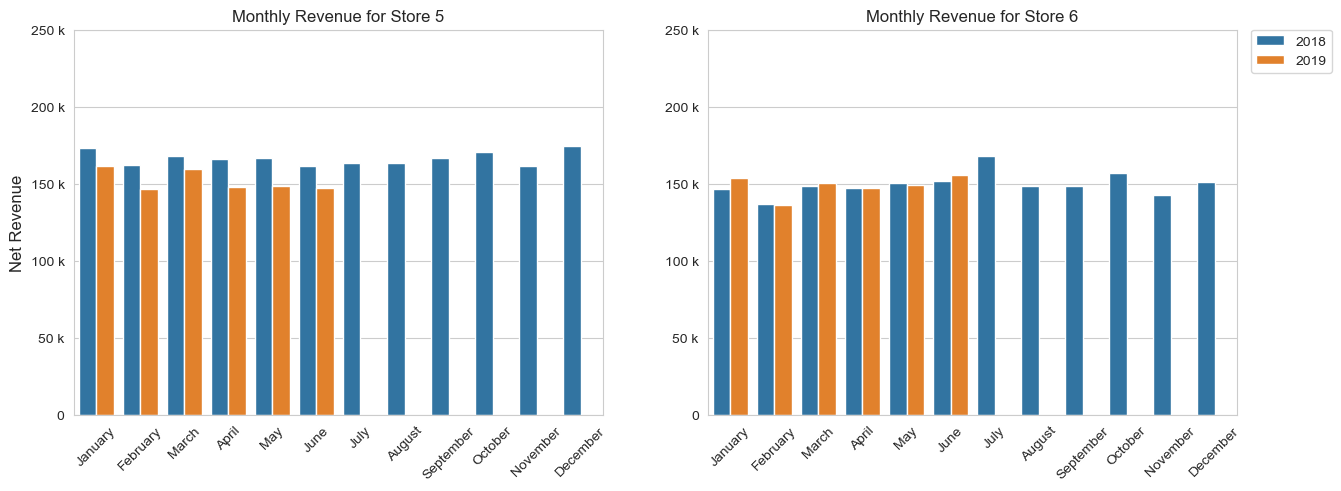

In [30]:
plt.figure(figsize = (15,5))
for i in range(5,7):
    plt.subplot(1,2,i-4)
    plot_store_sales(sales_duplicate[sales_duplicate.STORE==i], i)

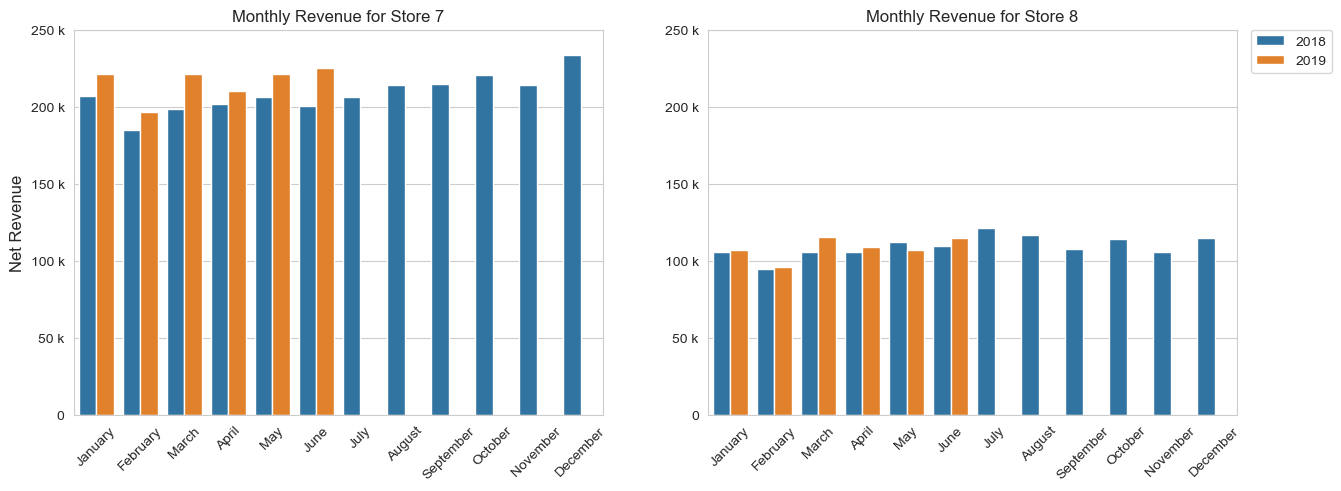

In [31]:
plt.figure(figsize = (15,5))
for i in range(7,9):
    plt.subplot(1,2,i-6)
    plot_store_sales(sales_duplicate[sales_duplicate.STORE==i], i)

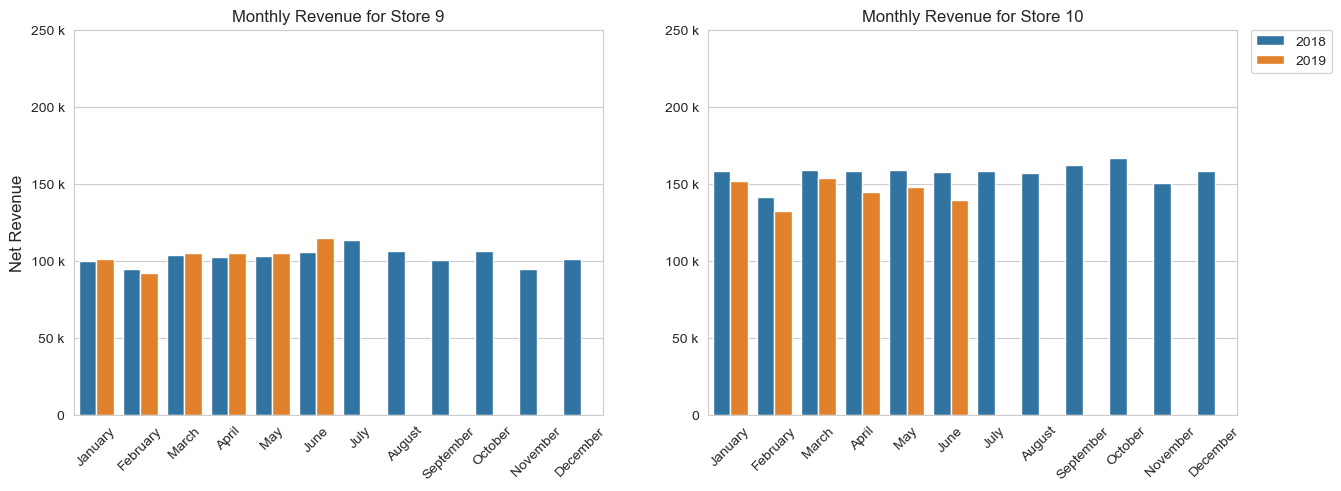

In [32]:
plt.figure(figsize = (15,5))
for i in range(9,11):
    plt.subplot(1,2,i-8)
    plot_store_sales(sales_duplicate[sales_duplicate.STORE==i], i)

In [33]:
def plot_store_customers(data, store_no=None):
    fig = sns.barplot(data=data, y='CUSTOMER_COUNT', x='MONTH_NAME', 
                hue='YEAR', orient='v', estimator='sum', errorbar=None)
    plt.xlabel(None)
    plt.xticks(rotation=45)
    plt.ylabel("Customer Count", size=12)
    plt.title(f"Monthly Customers for Store {store_no}")
    plt.legend(loc="upper right",bbox_to_anchor=(1.18, 1), borderaxespad=0)
    fig.yaxis.set_major_formatter(ticker.EngFormatter())
    if store_no != None:
        fig.set_ylim(bottom=0, top=40000)
        
        if store_no%2!=0:
            plt.legend().remove()
            
        if store_no%2==0:            
            plt.ylabel(None)

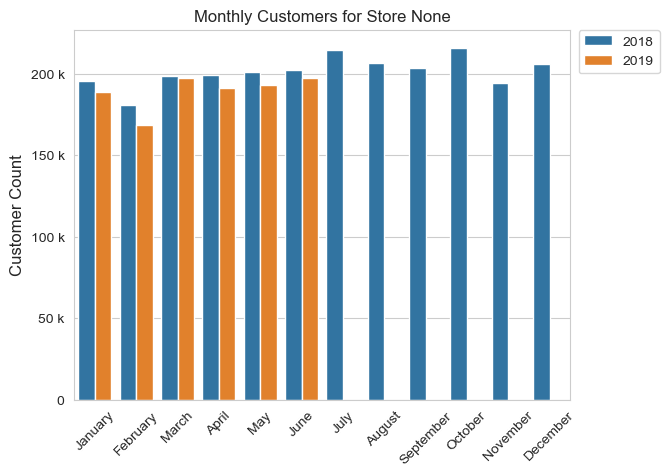

In [34]:
plot_store_customers(customers_duplicate)

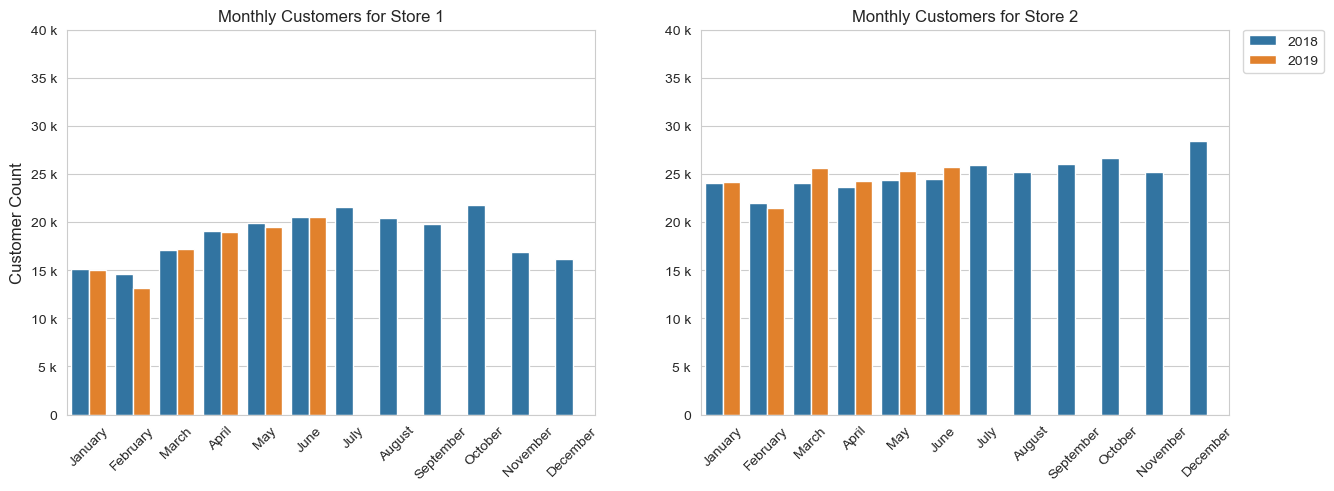

In [35]:
plt.figure(figsize = (15,5))
for i in range(1,3):
    plt.subplot(1,2,i)
    plot_store_customers(customers_duplicate[customers_duplicate.STORE==i], i)

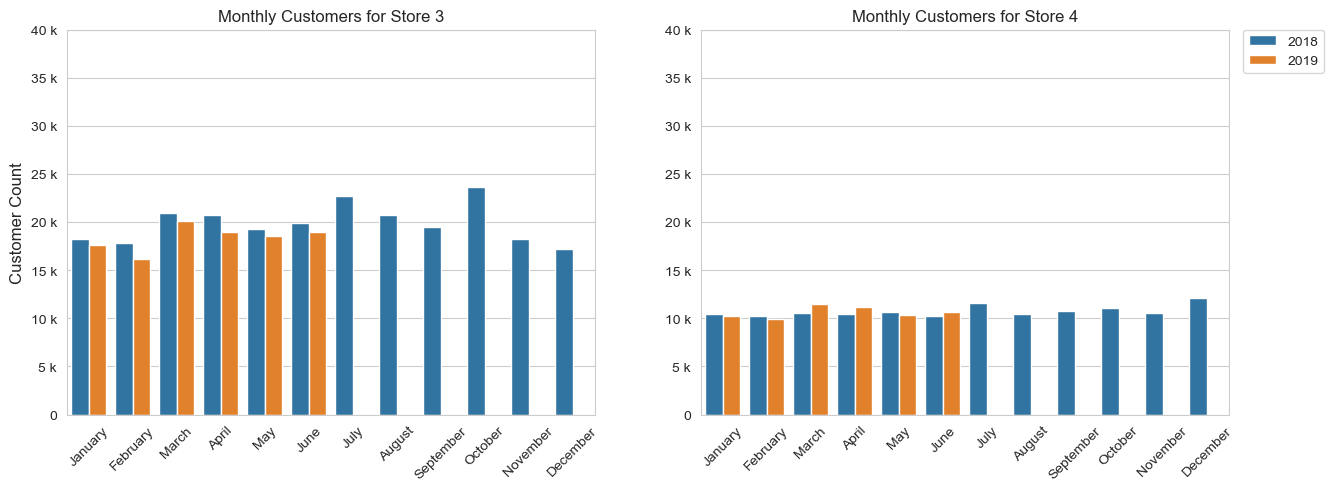

In [36]:
plt.figure(figsize = (15,5))
for i in range(3,5):
    plt.subplot(1,2,i-2)
    plot_store_customers(customers_duplicate[customers_duplicate.STORE==i], i)

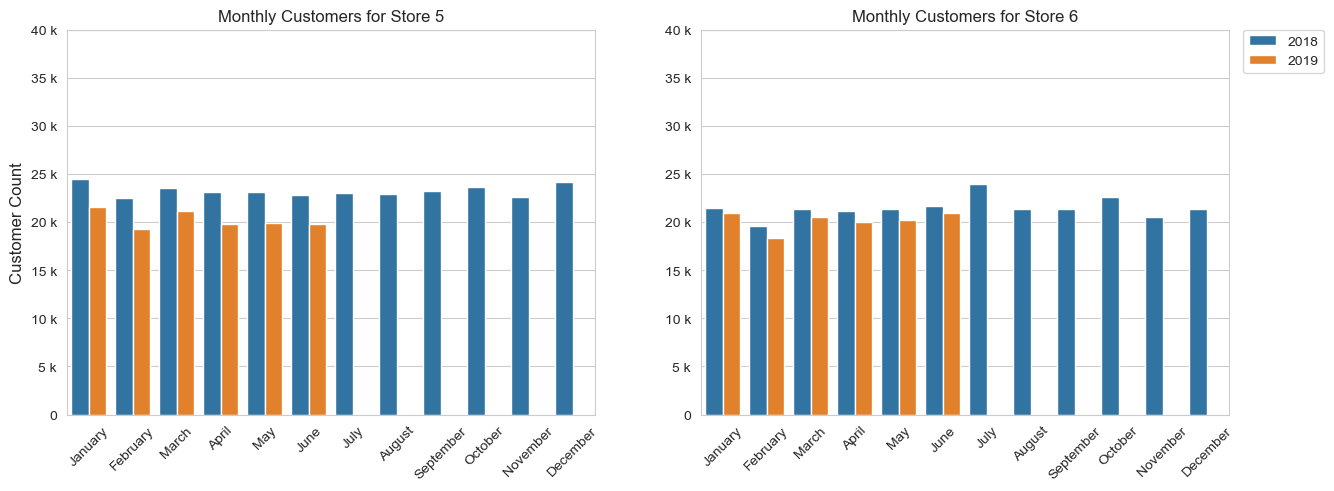

In [37]:
plt.figure(figsize = (15,5))
for i in range(5,7):
    plt.subplot(1,2,i-4)
    plot_store_customers(customers_duplicate[customers_duplicate.STORE==i], i)

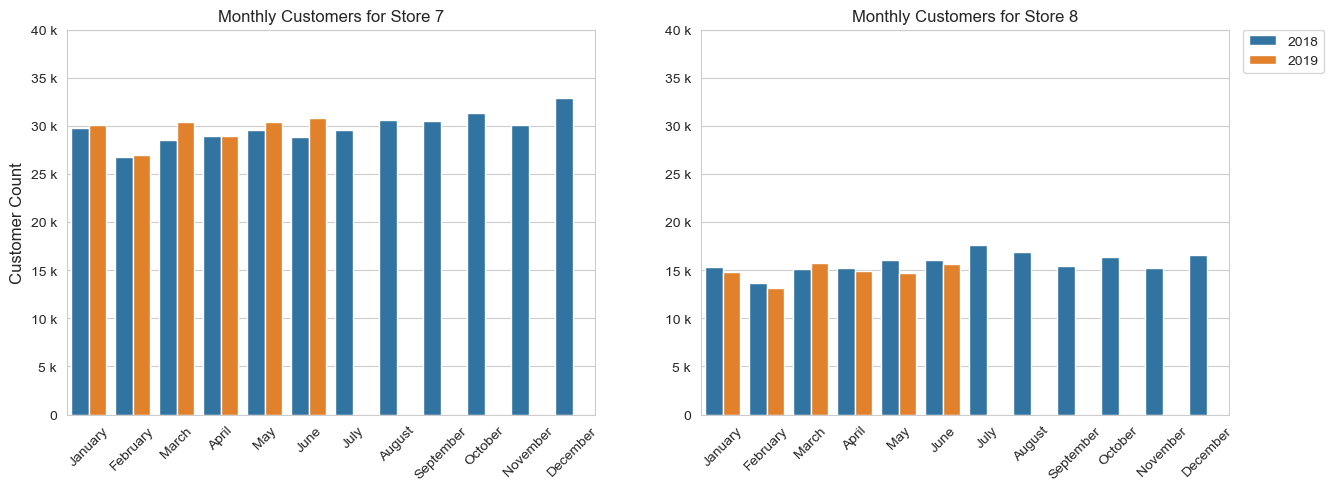

In [38]:
plt.figure(figsize = (15,5))
for i in range(7,9):
    plt.subplot(1,2,i-6)
    plot_store_customers(customers_duplicate[customers_duplicate.STORE==i], i)

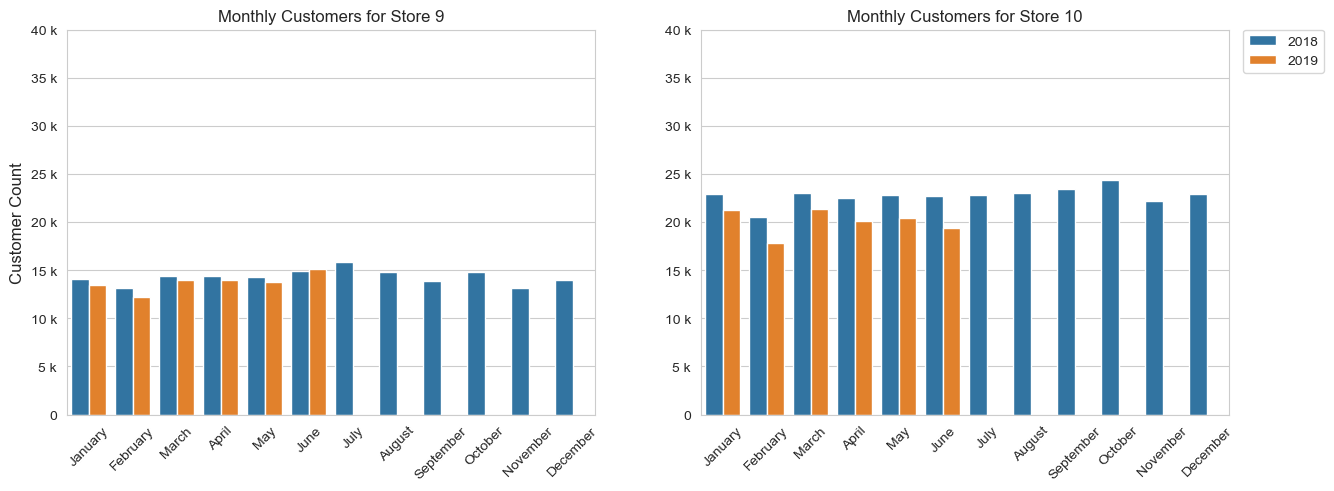

In [39]:
plt.figure(figsize = (15,5))
for i in range(9,11):
    plt.subplot(1,2,i-8)
    plot_store_customers(customers_duplicate[customers_duplicate.STORE==i], i)